In [1]:
import os
from datetime import datetime
# Make logging folder named according to current time
start_time_str = datetime.today().strftime('%d_%m_%Y__%H_%M_%S')
log_dir = './logs/'f"log_{start_time_str}"
os.makedirs(log_dir)

# Initialize logger that adds to text file in current logging folder
from logging_utils.initialize_logger import init_logger,get_logger
init_logger(save_dir=log_dir)
logger = get_logger()


# Initial log message
logger.info("Run with 100 linear problems and train frequency of 2.")

2020-05-05 20:42:41 [INFO] <ipython-input-1-73fdf89597ad> 15 - Run with 100 linear problems and train frequency of 2. Now with conditions for adding training data to avoid overfitting.


In [2]:
import numpy as np
A = np.matrix(
    [[1, 1], 
     [3, -4]]
)
e = 0
nmax_iter = 5
retrain_freq=2
x0 = np.array([0, 0])
n_steps = 100

In [3]:
# Set up parameter class
class MyParamsClass():
    def __init__(self, A,nmax_iter,retrain_freq,e,x0,n_steps):
        self.A = A.tolist()
        self.nmax_iter = nmax_iter
        self.n_steps =n_steps
        self.retrain_freq=retrain_freq
        self.e=e
        self.x0=x0.tolist()

In [4]:
import os
import json

params = MyParamsClass(A,nmax_iter,retrain_freq,e,x0,n_steps)
sorted_params_dict = {k: params.__dict__[k] for k 
                      in sorted(params.__dict__.keys())}

params_filepath = log_dir+'/params.json'
json.dump(sorted_params_dict, open(params_filepath, 'w'), indent=4)

In [5]:
from src_dir.gmres         import GMRES, matmul_a, mat_to_a
from src_dir.nn_collection import TwoLayerNet
from src_dir.nn_predictor  import nn_preconditioner

In [6]:
@nn_preconditioner(retrain_freq=retrain_freq, debug=True)
def MLGMRES(A, b, x0, e, nmax_iter):
    return GMRES(A, b, x0, e, nmax_iter)
    

In [7]:
Training_Iterations=np.arange(0,n_steps)

Error0=np.zeros((1,n_steps))
Error1=np.zeros((1,n_steps))
Error2=np.zeros((1,n_steps))
Error0_ML=np.zeros((1,n_steps))
Error1_ML=np.zeros((1,n_steps))
Error2_ML=np.zeros((1,n_steps))


In [8]:
for t in range(n_steps):
    b = np.array([14.*np.random.randn(), 11.*np.random.randn()])  # random b
    Out=MLGMRES(A, b, x0, e, nmax_iter) 
    Error0_ML[:,t]=np.linalg.norm(np.dot(A,Out[0])-b) # Error ML Iteration 1
    Error1_ML[:,t]=np.linalg.norm(np.dot(A,Out[1])-b) # Error ML Iteration 2
    Error2_ML[:,t]=np.linalg.norm(np.dot(A,Out[2])-b) # Error ML Iteration 3
    NonML_Out=GMRES(A, b, x0, e, nmax_iter)
    Error0[:,t]=np.linalg.norm(np.dot(A,NonML_Out[0])-b) # Error GMRES Iteration 1
    Error1[:,t]=np.linalg.norm(np.dot(A,NonML_Out[1])-b) # Error GMRES Iteration 2
    Error2[:,t]=np.linalg.norm(np.dot(A,NonML_Out[2])-b) # Error GMRES Iteration 3

retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining
retraining


In [9]:
import matplotlib.pyplot as pp

pp.plot(Training_Iterations,np.squeeze(Error0_ML),'r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error0),'k',label='GMRES')
pp.ylabel('Error for 0th GMRES iteration')
pp.xlabel('Linear Problem Iterations')
pp.legend(loc="upper left")
pp.savefig(log_dir+'/Iter0.png')
pp.show()

<Figure size 640x480 with 1 Axes>

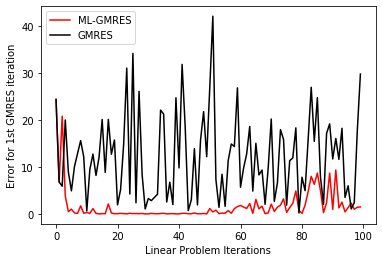

In [10]:
pp.plot(Training_Iterations,np.squeeze(Error1_ML),'r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error1),'k',label='GMRES')
pp.ylabel('Error for 1st GMRES iteration')
pp.legend(loc="upper left")
pp.xlabel('Linear Problem Iterations')
pp.savefig(log_dir+'/Iter1.png')
pp.show()

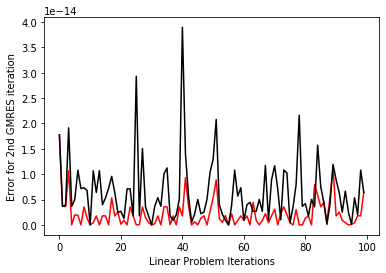

In [11]:
pp.plot(Training_Iterations,np.squeeze(Error2_ML),'r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error2),'k',label='GMRES')
pp.ylabel('Error for 2nd GMRES iteration')
pp.xlabel('Linear Problem Iterations')
pp.xlabel('Linear Problem Iterations')
pp.savefig(log_dir+'/Iter2.png')
pp.show()

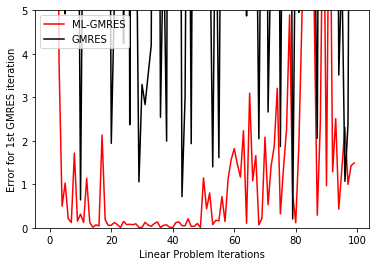

In [12]:
pp.plot(Training_Iterations,np.squeeze(Error1_ML),'r',label='ML-GMRES')
pp.plot(Training_Iterations,np.squeeze(Error1),'k',label='GMRES')
pp.ylabel('Error for 1st GMRES iteration')
pp.ylim((0, 5)) 
pp.legend(loc="upper left")
pp.xlabel('Linear Problem Iterations')
pp.savefig(log_dir+'/Iter1_zoom.png')
pp.show()

In [13]:
# logger.info("For this run, after 3 learning steps, the error seems to drop the most without over fitting. Next I will increase number of linear problems.")